In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import matplotlib.ticker as ticker # FormatterとLocatorはTickerモジュールが必要


In [12]:
record_eles={
    'a':(1,1),
    'b':(4,4)
}
stim_eles={
    'c':(3,3)
}

In [13]:
def disp_mea_all(record_eles,stim_eles):
    mat=np.zeros((5,5))
    for name, posi in record_eles.items():
        mat[posi]=-1
    for name, posi in stim_eles.items():
        mat[posi]=1

    fig = plt.figure(figsize=(3,3))
    axes = fig.add_subplot(1,1,1)
    im = axes.imshow(mat, vmin=-1., vmax=1,aspect=1, origin='lower',cmap="bwr") #heatmap

In [4]:
a=range(5,10)

In [5]:
np.s_[5:6,10:12]

(slice(5, 6, None), slice(10, 12, None))

In [6]:
a=[[4,100],[5,101]]

In [7]:
a=np.array(a)

In [8]:
a.max(axis=0)

array([  5, 101])

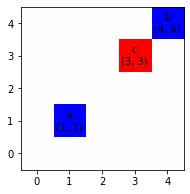

In [9]:
mat=np.zeros((5,5))
for name, posi in record_eles.items():
    mat[posi]=-1
for name, posi in stim_eles.items():
    mat[posi]=1

fig = plt.figure(figsize=(3,3))
axes = fig.add_subplot(1,1,1)

for name, posi in record_eles.items():
#     name+='\n test'
    txt = name + '\n' + str(posi)
    x,y=posi
    axes.text(x, y, txt, va='center', ha='center')
for name, posi in stim_eles.items():
    txt = name + '\n' + str(posi)
    x,y=posi
    axes.text(x, y, txt, va='center', ha='center')

im = axes.imshow(mat, vmin=-1., vmax=1,aspect=1, origin='lower',cmap="bwr") #heatmap


In [10]:
def drawMEA(mapping,stm_eles,figname=None,title=None):
    if title is None:
        title='MEA map'
    mat=mapping
    mat=mapping.transpose()
    fig = plt.figure(figsize=(11,6))
    axes = fig.add_subplot(1,1,1)
    # im = axes.imshow(C,aspect=1,vmin=0., vmax=2, cmap="jet") #heatmap
    im = axes.imshow(mat,vmin=-1., vmax=1,aspect=1,cmap="bwr") #heatmap
    axes.set_title(title)
    axes.yaxis.set_visible(False) #y軸のめもりを非表示
    axes.xaxis.set_visible(False) #y軸のめもりを非表示
    for sid,s in enumerate(stm_eles):
        elec_id=s
        x=elec_id%220
        y=elec_id//220
        byte='a'.encode('ascii')
        byte=[byte[0]+sid]
        char=bytes(byte).decode('ascii')
        axes.text(x+1, y+1, char)
    if figname is not None:
        fig.savefig(figname)

def makeMeaMap(path,figname=None,title=None):
    h5file=path+'activity.raw.h5'
    stmfile=path+'configs/stm.txt'

    mapping=np.zeros((220,120))
    with h5py.File(h5file, "r") as h5f:
        for e in h5f['mapping']:
            elec_id=e[1]
            i=elec_id%220
            j=elec_id//220
            mapping[i,j]=-0.5

    stm_eles=[]
    with open(stmfile, "r") as file:
        for line in file:
            stm_eles.append(int(line))
    if len(stm_eles) < 4:
        raise Excepion
    else:
        stm_eles=stm_eles[:4]
        
    for s in stm_eles:
        elec_id=s
        i=elec_id%220
        j=elec_id//220
        mapping[i,j]=1
    if figname is None:
        figname=path+'meamap'
    if title is None:
        title='meamap'
    drawMEA(mapping,stm_eles,figname,title)

In [11]:
b, a = signal.butter(4, 300, btype='high', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(300, color='green') # cutoff frequency
plt.show()

NameError: name 'signal' is not defined

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


lowcut,highcut=(300,3000)
fs = 20000  # Sampling frequency
# nyq = 0.5 * 0.95 * fs
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

b, a = signal.butter(4, [300,3000], btype='band', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()